In [1]:
from pymbar import timeseries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



In [2]:
def autocorr(x):
    xp = x - x.mean()
    min_number_zeros = 2 * len(xp) - 1
    # Zero pad to the next power of two for maximum speed.
    fts = 2 ** np.ceil(np.log2(min_number_zeros)).astype('int')
    ft = np.fft.fft(np.array(xp), fts)
    corr = np.fft.ifft(ft.conjugate() * ft)[:len(xp)].real
    corr /= np.arange(len(xp), 0, -1)
    corr /= corr[0]
    return corr


In [3]:
# 10
ecmc_events = []
ecmc_ff_events = []
markov_sf_df = pd.read_csv("../markov_sf_10m-1020-3.csv")
markov_sf = np.array(markov_sf_df["sf"].to_list())

ecmc_sf_df = pd.read_csv("../ecmc_sf_10m-1020-4.csv")
ecmc_sf = np.array(ecmc_sf_df["sf"].to_list())
ecmc_events.append(np.mean(ecmc_sf_df["events"].to_list()))

ecmc_ff_sf_df = pd.read_csv("../ecmc_ff_sf_10m-1020-4.csv")
ecmc_ff_sf = np.array(ecmc_ff_sf_df["sf"].to_list())
ecmc_ff_events.append(np.mean(ecmc_ff_sf_df["events"].to_list()))

# #2010
markov_sf_2010_df = pd.read_csv("../markov_sf_10m-2010-3.csv")
markov_sf_2010 = np.array(markov_sf_2010_df["sf"].to_list())

ecmc_sf_2010_df = pd.read_csv("../ecmc_sf_10m-2010-4.csv")
ecmc_sf_2010 = np.array(ecmc_sf_2010_df["sf"].to_list())
ecmc_events.append(np.mean(ecmc_sf_2010_df["events"].to_list()))

ecmc_ff_sf_2010_df = pd.read_csv("../ecmc_ff_sf_10m-2010-4.csv")
ecmc_ff_sf_2010 = np.array(ecmc_ff_sf_2010_df["sf"].to_list())
ecmc_ff_events.append(np.mean(ecmc_ff_sf_2010_df["events"].to_list()))

# #4005
markov_sf_4005_df = pd.read_csv("../markov_sf_10m-4005-3.csv")
markov_sf_4005 = np.array(markov_sf_4005_df["sf"].to_list())

ecmc_sf_4005_df = pd.read_csv("../ecmc_sf_10m-4005-4.csv")
ecmc_sf_4005 = np.array(ecmc_sf_4005_df["sf"].to_list())
ecmc_events.append(np.mean(ecmc_sf_4005_df["events"].to_list()))

ecmc_ff_sf_4005_df = pd.read_csv("../ecmc_ff_sf_10m-4005-4.csv")
ecmc_ff_sf_4005 = np.array(ecmc_ff_sf_4005_df["sf"].to_list())
ecmc_ff_events.append(np.mean(ecmc_ff_sf_4005_df["events"].to_list()))

# #6003
markov_sf_6003_df = pd.read_csv("../markov_sf_10m-6003-3.csv")
markov_sf_6003 = np.array(markov_sf_6003_df["sf"].to_list())

ecmc_sf_6003_df = pd.read_csv("../ecmc_sf_10m-6003-4.csv")
ecmc_sf_6003 = np.array(ecmc_sf_6003_df["sf"].to_list())
ecmc_events.append(np.mean(ecmc_sf_6003_df["events"].to_list()))

ecmc_ff_sf_6003_df = pd.read_csv("../ecmc_ff_sf_10m-6003-4.csv")
ecmc_ff_sf_6003 = np.array(ecmc_ff_sf_6003_df["sf"].to_list())
ecmc_ff_events.append(np.mean(ecmc_ff_sf_6003_df["events"].to_list()))

# 100
markov_sf_100_df = pd.read_csv("../cpp_test/mc_1d_disk/markov_sf_10m-100.csv")
markov_sf_100 = np.array(markov_sf_100_df["sf"].to_list())

ecmc_sf_100_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_sf_10m-100.csv")
ecmc_sf_100 = np.array(ecmc_sf_100_df["sf"].to_list())
ecmc_events.append(np.mean(ecmc_sf_100_df["events"].to_list()))

ecmc_ff_sf_100_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_ff_sf_10m-100.csv")
ecmc_ff_sf_100 = np.array(ecmc_ff_sf_100_df["sf"].to_list())
ecmc_ff_events.append(np.mean(ecmc_ff_sf_100_df["events"].to_list()))

#128
markov_sf_128_df = pd.read_csv("../cpp_test/mc_1d_disk/markov_sf_10m-128.csv")
markov_sf_128 = np.array(markov_sf_128_df["sf"].to_list())

ecmc_sf_128_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_sf_10m-128.csv")
ecmc_sf_128 = np.array(ecmc_sf_128_df["sf"].to_list())
ecmc_events.append(np.mean(ecmc_sf_128_df["events"].to_list()))

ecmc_ff_sf_128_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_ff_sf_10m-128.csv")
ecmc_ff_sf_128 = np.array(ecmc_ff_sf_128_df["sf"].to_list())
ecmc_ff_events.append(np.mean(ecmc_ff_sf_128_df["events"].to_list()))

#256
markov_sf_256_df = pd.read_csv("../cpp_test/mc_1d_disk/markov_sf_10m-256.csv")
markov_sf_256 = np.array(markov_sf_256_df["sf"].to_list())

ecmc_sf_256_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_sf_10m-256.csv")
ecmc_sf_256 = np.array(ecmc_sf_256_df["sf"].to_list())
ecmc_events.append(np.mean(ecmc_sf_256_df["events"].to_list()))

ecmc_ff_sf_256_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_ff_sf_10m-256.csv")
ecmc_ff_sf_256 = np.array(ecmc_ff_sf_256_df["sf"].to_list())
ecmc_ff_events.append(np.mean(ecmc_ff_sf_256_df["events"].to_list()))

#512
markov_sf_512_df = pd.read_csv("../cpp_test/mc_1d_disk/markov_sf_10m-512.csv")
markov_sf_512 = np.array(markov_sf_512_df["sf"].to_list())

ecmc_sf_512_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_sf_10m-512.csv")
ecmc_sf_512 = np.array(ecmc_sf_512_df["sf"].to_list())
ecmc_events.append(np.mean(ecmc_sf_512_df["events"].to_list()))

ecmc_ff_sf_512_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_ff_sf_10m-512.csv")
ecmc_ff_sf_512 = np.array(ecmc_ff_sf_512_df["sf"].to_list())
ecmc_ff_events.append(np.mean(ecmc_ff_sf_512_df["events"].to_list()))

# 1024
ecmc_sf_1024_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_sf_10m-1024.csv")
ecmc_sf_1024 = np.array(ecmc_sf_1024_df["sf"].to_list())
ecmc_events.append(np.mean(ecmc_sf_1024_df["events"].to_list()))

ecmc_ff_sf_1024_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_ff_sf_10m-1024.csv")
ecmc_ff_sf_1024 = np.array(ecmc_ff_sf_1024_df["sf"].to_list())
ecmc_ff_events.append(np.mean(ecmc_ff_sf_1024_df["events"].to_list()))

# 2048
ecmc_sf_2048_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_sf_10m-2048.csv")
ecmc_sf_2048 = np.array(ecmc_sf_2048_df["sf"].to_list())
ecmc_events.append(np.mean(ecmc_sf_2048_df["events"].to_list()))

ecmc_ff_sf_2048_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_ff_sf_10m-2048.csv")
ecmc_ff_sf_2048 = np.array(ecmc_ff_sf_2048_df["sf"].to_list())
ecmc_ff_events.append(np.mean(ecmc_ff_sf_2048_df["events"].to_list()))


In [44]:
third_section = int(np.floor(len(markov_sf)/3))

# ECMC FF
ecmc_ff_exp_events = []
ecmc_ff_sf_nr_mean = []
ecmc_ff_sf_exp_8_df = pd.read_csv("~/Downloads/ecmc_ff_sf_nr_10m-8.csv")
ecmc_ff_sf_exp_16_df = pd.read_csv("~/Downloads/ecmc_ff_sf_nr_10m-16.csv")
ecmc_ff_sf_exp_32_df = pd.read_csv("~/Downloads/ecmc_ff_sf_nr_10m-32.csv")
ecmc_ff_sf_exp_64_df = pd.read_csv("~/Downloads/ecmc_ff_sf_nr_10m-64.csv")
ecmc_ff_sf_exp_128_df = pd.read_csv("~/Downloads/ecmc_ff_sf_nr_10m-128.csv")
ecmc_ff_sf_exp_256_df = pd.read_csv("~/Downloads/ecmc_ff_sf_nr_10m-256.csv")
ecmc_ff_sf_exp_512_df = pd.read_csv("~/Downloads/ecmc_ff_sf_nr_10m-512.csv")
ecmc_ff_sf_exp_1024_df = pd.read_csv("~/Downloads/ecmc_ff_sf_nr_10m-1024.csv")
ecmc_ff_sf_exp_2048_df = pd.read_csv("~/Downloads/ecmc_ff_sf_nr_10m-2048.csv")

ecmc_ff_sf_exp_8 = np.array(ecmc_ff_sf_exp_8_df["sf"].to_list())
ecmc_ff_sf_exp_16 = np.array(ecmc_ff_sf_exp_16_df["sf"].to_list())
ecmc_ff_sf_exp_32 = np.array(ecmc_ff_sf_exp_32_df["sf"].to_list())
ecmc_ff_sf_exp_64 = np.array(ecmc_ff_sf_exp_64_df["sf"].to_list())
ecmc_ff_sf_exp_128 = np.array(ecmc_ff_sf_exp_128_df["sf"].to_list())
ecmc_ff_sf_exp_256 = np.array(ecmc_ff_sf_exp_256_df["sf"].to_list())
ecmc_ff_sf_exp_512 = np.array(ecmc_ff_sf_exp_512_df["sf"].to_list())
ecmc_ff_sf_exp_1024 = np.array(ecmc_ff_sf_exp_1024_df["sf"].to_list())
ecmc_ff_sf_exp_2048 = np.array(ecmc_ff_sf_exp_2048_df["sf"].to_list())

ecmc_ff_exp_events.append(np.mean(ecmc_ff_sf_exp_8_df["events"].to_list()))
ecmc_ff_exp_events.append(np.mean(ecmc_ff_sf_exp_16_df["events"].to_list()))
ecmc_ff_exp_events.append(np.mean(ecmc_ff_sf_exp_32_df["events"].to_list()))
ecmc_ff_exp_events.append(np.mean(ecmc_ff_sf_exp_64_df["events"].to_list()))
ecmc_ff_exp_events.append(np.mean(ecmc_ff_sf_exp_128_df["events"].to_list()))
ecmc_ff_exp_events.append(np.mean(ecmc_ff_sf_exp_256_df["events"].to_list()))
ecmc_ff_exp_events.append(np.mean(ecmc_ff_sf_exp_512_df["events"].to_list()))
ecmc_ff_exp_events.append(np.mean(ecmc_ff_sf_exp_1024_df["events"].to_list()))
ecmc_ff_exp_events.append(np.mean(ecmc_ff_sf_exp_2048_df["events"].to_list()))

ecmc_ff_sf_nr_mean.append(np.mean(ecmc_ff_sf_exp_8_df["sf"].to_list()[third_section:]))
ecmc_ff_sf_nr_mean.append(np.mean(ecmc_ff_sf_exp_16_df["sf"].to_list()[third_section:]))
ecmc_ff_sf_nr_mean.append(np.mean(ecmc_ff_sf_exp_32_df["sf"].to_list()[third_section:]))
ecmc_ff_sf_nr_mean.append(np.mean(ecmc_ff_sf_exp_64_df["sf"].to_list()[third_section:]))
ecmc_ff_sf_nr_mean.append(np.mean(ecmc_ff_sf_exp_128_df["sf"].to_list()[third_section:]))
ecmc_ff_sf_nr_mean.append(np.mean(ecmc_ff_sf_exp_256_df["sf"].to_list()[third_section:]))
ecmc_ff_sf_nr_mean.append(np.mean(ecmc_ff_sf_exp_512_df["sf"].to_list()[third_section:]))
ecmc_ff_sf_nr_mean.append(np.mean(ecmc_ff_sf_exp_1024_df["sf"].to_list()[third_section:]))
ecmc_ff_sf_nr_mean.append(np.mean(ecmc_ff_sf_exp_2048_df["sf"].to_list()[third_section:]))

# ECMC
ecmc_events = []
ecmc_sf_mean = []
ecmc_sf_8_df = pd.read_csv("~/Downloads/ecmc_sf_10m-8.csv")
ecmc_sf_16_df = pd.read_csv("~/Downloads/ecmc_sf_10m-16.csv")
ecmc_sf_32_df = pd.read_csv("~/Downloads/ecmc_sf_10m-32.csv")
ecmc_sf_64_df = pd.read_csv("~/Downloads/ecmc_sf_10m-64.csv")
ecmc_sf_128_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_sf_10m-128.csv") # done
ecmc_sf_256_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_sf_10m-256.csv") # done
ecmc_sf_512_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_sf_10m-512.csv") # done
ecmc_sf_1024_df = pd.read_csv("../cpp_test/mc_1d_disk/ecmc_sf_10m-1024.csv")
ecmc_sf_2048_df = pd.read_csv("~/Downloads/ecmc_sf_10m-2048.csv")

ecmc_sf_8 = np.array(ecmc_sf_8_df["sf"].to_list())
ecmc_sf_16 = np.array(ecmc_sf_16_df["sf"].to_list())
ecmc_sf_32 = np.array(ecmc_sf_32_df["sf"].to_list())
ecmc_sf_64 = np.array(ecmc_sf_64_df["sf"].to_list())
ecmc_sf_128 = np.array(ecmc_sf_128_df["sf"].to_list())
ecmc_sf_256 = np.array(ecmc_sf_256_df["sf"].to_list())
ecmc_sf_512 = np.array(ecmc_sf_512_df["sf"].to_list())
ecmc_sf_1024 = np.array(ecmc_sf_1024_df["sf"].to_list())
ecmc_sf_2048 = np.array(ecmc_sf_2048_df["sf"].to_list())

ecmc_ff_exp_events.append(np.mean(ecmc_ff_sf_exp_8_df["events"].to_list()))
ecmc_events.append(np.mean(ecmc_sf_16_df["events"].to_list()))
ecmc_events.append(np.mean(ecmc_sf_32_df["events"].to_list()))
ecmc_events.append(np.mean(ecmc_sf_64_df["events"].to_list()))
ecmc_events.append(np.mean(ecmc_sf_128_df["events"].to_list()))
ecmc_events.append(np.mean(ecmc_sf_256_df["events"].to_list()))
ecmc_events.append(np.mean(ecmc_sf_512_df["events"].to_list()))
ecmc_events.append(np.mean(ecmc_sf_1024_df["events"].to_list()))
ecmc_events.append(np.mean(ecmc_sf_2048_df["events"].to_list()))

ecmc_sf_mean.append(np.mean(ecmc_sf_8_df["sf"].to_list()[third_section:]))
ecmc_sf_mean.append(np.mean(ecmc_sf_16_df["sf"].to_list()[third_section:]))
ecmc_sf_mean.append(np.mean(ecmc_sf_32_df["sf"].to_list()[third_section:]))
ecmc_sf_mean.append(np.mean(ecmc_sf_64_df["sf"].to_list()[third_section:]))
ecmc_sf_mean.append(np.mean(ecmc_sf_128_df["sf"].to_list()[third_section:]))
ecmc_sf_mean.append(np.mean(ecmc_sf_256_df["sf"].to_list()[third_section:]))
ecmc_sf_mean.append(np.mean(ecmc_sf_512_df["sf"].to_list()[third_section:]))
ecmc_sf_mean.append(np.mean(ecmc_sf_1024_df["sf"].to_list()[third_section:]))
ecmc_sf_mean.append(np.mean(ecmc_sf_2048_df["sf"].to_list()[third_section:]))

print(ecmc_sf_mean)
print(ecmc_ff_sf_nr_mean)

[0.2610283893719492, 0.25417795769199636, 0.25422291307403233, 0.2484739533044863, 0.24541163524963402, 0.2503285937602262, 0.24213363115462314, 0.25030935333986043, 0.2607018040417796]
[0.26141837455712563, 0.25535051225319466, 0.25294267298642065, 0.251185524694347, 0.24901530070430106, 0.24990281841805295, 0.25113164196909865, 0.25103596376782106, 0.25228935591517226]


#### Autocorrelation Times

In [22]:
third_section = int(np.floor(len(markov_sf)/3))

markov_at = autocorr(markov_sf[third_section:])
markov_at1 = autocorr(markov_sf_2010[third_section:])
markov_at2 = autocorr(markov_sf_4005[third_section:])
markov_at3 = autocorr(markov_sf_6003[third_section:])
markov_at4 = autocorr(markov_sf_100[third_section:])
markov_at5 = autocorr(markov_sf_128[third_section:])
markov_at6 = autocorr(markov_sf_256[third_section:])
markov_at7 = autocorr(markov_sf_512[third_section:])

ecmc_at = autocorr(ecmc_sf[third_section:])
ecmc_at1 = autocorr(ecmc_sf_2010[third_section:])
ecmc_at2 = autocorr(ecmc_sf_4005[third_section:])
ecmc_at3 = autocorr(ecmc_sf_6003[third_section:])
ecmc_at4 = autocorr(ecmc_sf_100[third_section:])
ecmc_at5 = autocorr(ecmc_sf_128[third_section:])
ecmc_at6 = autocorr(ecmc_sf_256[third_section:])
ecmc_at7 = autocorr(ecmc_sf_512[third_section:])
ecmc_at8 = autocorr(ecmc_sf_1024[third_section:])
ecmc_at9 = autocorr(ecmc_sf_2048[third_section:])

ecmc_ff_at = autocorr(ecmc_ff_sf[third_section:])
ecmc_ff_at1 = autocorr(ecmc_ff_sf_2010[third_section:])
ecmc_ff_at2 = autocorr(ecmc_ff_sf_4005[third_section:])
ecmc_ff_at3 = autocorr(ecmc_ff_sf_6003[third_section:])
ecmc_ff_at4 = autocorr(ecmc_ff_sf_100[third_section:])
ecmc_ff_at5 = autocorr(ecmc_ff_sf_128[third_section:])
ecmc_ff_at6 = autocorr(ecmc_ff_sf_256[third_section:])
ecmc_ff_at7 = autocorr(ecmc_ff_sf_512[third_section:])
ecmc_ff_at8 = autocorr(ecmc_ff_sf_1024[third_section:])
ecmc_ff_at9 = autocorr(ecmc_ff_sf_2048[third_section:])

ecmc_ff_exp_at = autocorr(ecmc_ff_sf_exp_8[third_section:])
ecmc_ff_exp_at1 = autocorr(ecmc_ff_sf_exp_16[third_section:])
ecmc_ff_exp_at2 = autocorr(ecmc_ff_sf_exp_32[third_section:])
ecmc_ff_exp_at3 = autocorr(ecmc_ff_sf_exp_64[third_section:])
ecmc_ff_exp_at4 = autocorr(ecmc_ff_sf_exp_128[third_section:])
ecmc_ff_exp_at5 = autocorr(ecmc_ff_sf_exp_256[third_section:])
ecmc_ff_exp_at6 = autocorr(ecmc_ff_sf_exp_512[third_section:])
ecmc_ff_exp_at7 = autocorr(ecmc_ff_sf_exp_1024[third_section:])
# ecmc_ff_exp_at8 = autocorr(ecmc_ff_sf_exp_2048[third_section:])


#### Integrated Autocorrelation Times


In [23]:
def integrated_autocorrelation_time(A_n):
    A_n = np.array(A_n)

    N = A_n.size

    g = 1.0

    A_mean = A_n.mean()

    

In [6]:
markov_iats = []
markov_iats.append(timeseries.integrated_autocorrelation_time(markov_sf[third_section:], fast=True))
markov_iats.append(timeseries.integrated_autocorrelation_time(markov_sf_2010[third_section:], fast=True))
markov_iats.append(timeseries.integrated_autocorrelation_time(markov_sf_4005[third_section:], fast=True))
markov_iats.append(timeseries.integrated_autocorrelation_time(markov_sf_6003[third_section:], fast=True))
markov_iats.append(timeseries.integrated_autocorrelation_time(markov_sf_100[third_section:], fast=True))
markov_iats.append(timeseries.integrated_autocorrelation_time(markov_sf_128[third_section:], fast=True))
markov_iats.append(timeseries.integrated_autocorrelation_time(markov_sf_256[third_section:], fast=True))
markov_iats.append(timeseries.integrated_autocorrelation_time(markov_sf_512[third_section:], fast=True))

print([i for i in markov_iats])

ecmc_iats = []
ecmc_iats.append(timeseries.integrated_autocorrelation_time(ecmc_sf[third_section:], fast=True))
ecmc_iats.append(timeseries.integrated_autocorrelation_time(ecmc_sf_2010[third_section:], fast=True))
ecmc_iats.append(timeseries.integrated_autocorrelation_time(ecmc_sf_4005[third_section:], fast=True))
ecmc_iats.append(timeseries.integrated_autocorrelation_time(ecmc_sf_6003[third_section:], fast=True))
ecmc_iats.append(timeseries.integrated_autocorrelation_time(ecmc_sf_100[third_section:], fast=True))
ecmc_iats.append(timeseries.integrated_autocorrelation_time(ecmc_sf_128[third_section:], fast=True))
ecmc_iats.append(timeseries.integrated_autocorrelation_time(ecmc_sf_256[third_section:], fast=True))
ecmc_iats.append(timeseries.integrated_autocorrelation_time(ecmc_sf_512[third_section:], fast=True))
ecmc_iats.append(timeseries.integrated_autocorrelation_time(ecmc_sf_1024[third_section:], fast=True))
ecmc_iats.append(timeseries.integrated_autocorrelation_time(ecmc_sf_2048[third_section:], fast=True))


print([i for i in ecmc_iats])

ecmc_ff_iats = []
ecmc_ff_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf[third_section:], fast=True))
ecmc_ff_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_2010[third_section:], fast=True))
ecmc_ff_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_4005[third_section:], fast=True))
ecmc_ff_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_6003[third_section:], fast=True))
ecmc_ff_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_100[third_section:], fast=True))
ecmc_ff_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_128[third_section:], fast=True))
ecmc_ff_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_256[third_section:], fast=True))
ecmc_ff_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_512[third_section:], fast=True))
ecmc_ff_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_1024[third_section:], fast=True))
ecmc_ff_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_2048[third_section:], fast=True))


print([i for i in ecmc_ff_iats])



[22.222962797219143, 42.01209875555623, 1160.9555650910777, 3915.9497447504054, 16804.528801446806, 75953.51063468463, 337655.0799803914, 1159015.8661724834]
[58.0239626568105, 116.58057168890048, 229.95036809145947, 345.3329226164388, 606.3841080795255, 737.7614244065904, 1420.938530587051, 2561.3602632056645, 5576.047322009092, 14548.925543598109]
[0.00792813448795826, 0.030453916888237065, 0.16167525520742465, 0.3246621546196621, 8.584566950336917, 0.9582191852364021, 2.120769697362315, 4.263209289181418, 8.213073572425188, 15.933627390280265]


In [24]:
ecmc_ff_exp_iats = []
ecmc_ff_exp_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_exp_8[third_section:], fast=True))
ecmc_ff_exp_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_exp_16[third_section:], fast=True))
ecmc_ff_exp_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_exp_32[third_section:], fast=True))
ecmc_ff_exp_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_exp_64[third_section:], fast=True))
ecmc_ff_exp_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_exp_128[third_section:], fast=True))
ecmc_ff_exp_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_exp_256[third_section:], fast=True))
ecmc_ff_exp_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_exp_512[third_section:], fast=True))
ecmc_ff_exp_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_exp_1024[third_section:], fast=True))
# ecmc_ff_exp_iats.append(timeseries.integrated_autocorrelation_time(ecmc_ff_sf_exp_2048[third_section:], fast=True))

print([i for i in ecmc_ff_exp_iats])


[11.096874508239454, 16.032962669384567, 23.59855878393982, 32.86692988501848, 44.964511529196685, 64.70703465789158, 90.29822528339822, 129.09269939050947]


#### Matching IAT with Autocorrelation Times

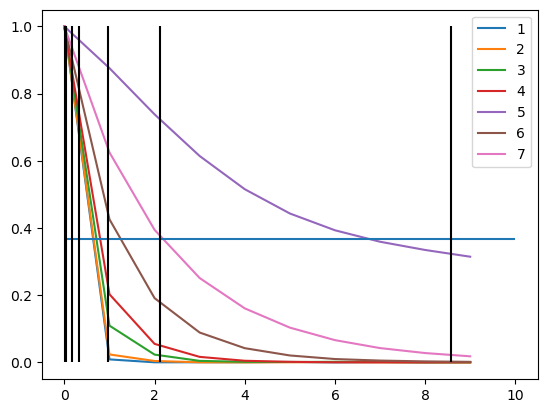

In [25]:
plt.plot(ecmc_ff_at[:10], label="1")
plt.plot(ecmc_ff_at1[:10], label="2")
plt.plot(ecmc_ff_at2[:10], label="3")
plt.plot(ecmc_ff_at3[:10], label="4")
plt.plot(ecmc_ff_at4[:10], label="5")
plt.plot(ecmc_ff_at5[:10], label="6")
plt.plot(ecmc_ff_at6[:10], label="7")
# plt.plot(ecmc_ff_at7[:10], label="4")
# plt.plot(ecmc_ff_at8[:10], label="4")
# plt.plot(ecmc_ff_at9[:20], label="4")

plt.hlines([1/np.e], [0], [10])
end = 7
plt.vlines(ecmc_ff_iats[:end], [0 for i in range(len(ecmc_ff_iats[:end]))], [1 for i in range(len(ecmc_ff_iats[:end]))], colors=["black", "black", "black", "black"])
plt.legend()

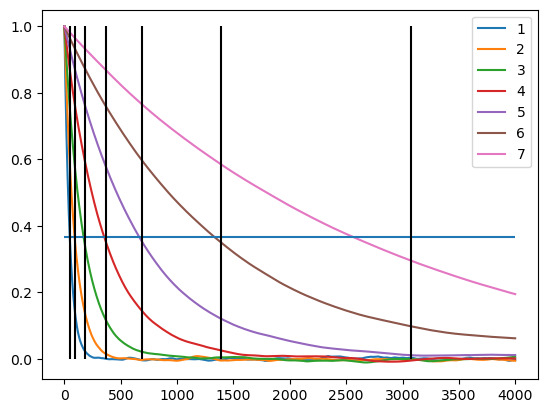

In [16]:
plt.plot(ecmc_ff_exp_at[:4000], label="1")
plt.plot(ecmc_ff_exp_at1[:4000], label="2")
plt.plot(ecmc_ff_exp_at2[:4000], label="3")
plt.plot(ecmc_ff_exp_at3[:4000], label="4")
plt.plot(ecmc_ff_exp_at4[:4000], label="5")
plt.plot(ecmc_ff_exp_at5[:4000], label="6")
plt.plot(ecmc_ff_exp_at6[:4000], label="7")
# plt.plot(ecmc_ff_at7[:10], label="4")
# plt.plot(ecmc_ff_at8[:10], label="4")
# plt.plot(ecmc_ff_at9[:20], label="4")

plt.hlines([1/np.e], [0], [4000])
end = 7
plt.vlines(ecmc_ff_exp_iats[:end], [0 for i in range(len(ecmc_ff_iats[:end]))], [1 for i in range(len(ecmc_ff_iats[:end]))], colors=["black", "black", "black", "black"])
plt.legend()

#### Plotting Integrated Autocorrelation Times per Sweep vs System Size

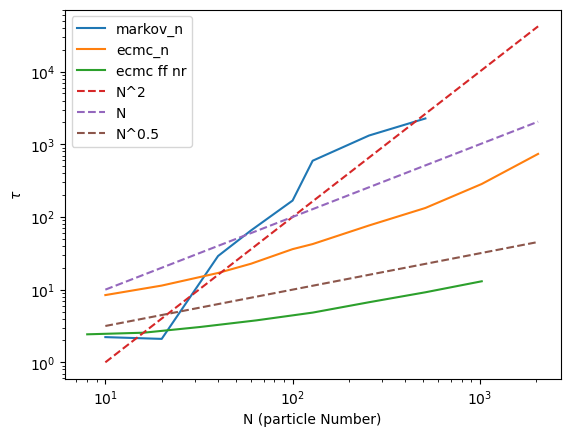

In [37]:
fig, ax1 = plt.subplots()
system_sizes_m = [10, 20, 40, 60, 100, 128, 256, 512]
system_sizes = [10, 20, 40, 60, 100, 128, 256, 512, 1024, 2048]
system_sizes_2 = [8, 16, 32, 64, 128, 256, 512, 1024]
ax1.plot(system_sizes_m, [iat/system_sizes_m[idx] for idx, iat in enumerate(markov_iats)], label="markov_n")
ax1.plot(system_sizes, [iat*ecmc_events[idx]/system_sizes[idx] for idx, iat in enumerate(ecmc_iats)], label="ecmc_n")
# ax1.plot(system_sizes, [iat*ecmc_ff_events[idx]/system_sizes[idx] for idx, iat in enumerate(ecmc_ff_iats)], label="ecmc ff_n")
ax1.plot(system_sizes_2, [iat*ecmc_ff_exp_events[idx]/system_sizes_2[idx] for idx, iat in enumerate(ecmc_ff_exp_iats)], label="ecmc ff nr")

ax1.plot(system_sizes, (np.array(system_sizes)*0.1)**2, linestyle="dashed", label="N^2")
ax1.plot(system_sizes, np.array(system_sizes), linestyle="dashed", label="N")
ax1.plot(system_sizes, np.array(system_sizes)**0.5, linestyle="dashed", label="N^0.5")


# ax1.plot(system_sizes_m, [iat/system_sizes_m[idx] for idx, iat in enumerate(markov_iats)], label="markov_n")
# ax1.plot(system_sizes, [iat*ecmc_events[idx]/system_sizes[idx] for idx, iat in enumerate(ecmc_iats)], label="ecmc_n")
# ax1.plot(system_sizes, [iat*ecmc_ff_events[idx]/system_sizes[idx] for idx, iat in enumerate(ecmc_ff_iats)], label="ecmc ff_n")
# ax1.plot(system_sizes_2, [iat*ecmc_ff_exp_events[idx]/system_sizes_2[idx] for idx, iat in enumerate(ecmc_ff_exp_iats)], label="ecmc ff exp n")

# ax1.plot(system_sizes, markov_iats, label="markov")
# ax1.plot(system_sizes, ecmc_iats, label="ecmc")
# ax1.plot(system_sizes, ecmc_ff_iats, label="ecmc ff")

ax1.set_xlabel("N (particle Number)")
ax1.set_ylabel("$\\tau$")
ax1.set_yscale("log")
ax1.set_xscale('log') 
plt.legend()
